## Tạo 300 điểm dữ liệu với 4 phân cụm, dùng thư viện sklearn để tìm điểm centroid của 4 phân cụng đó và vẽ lên trục toạ độ

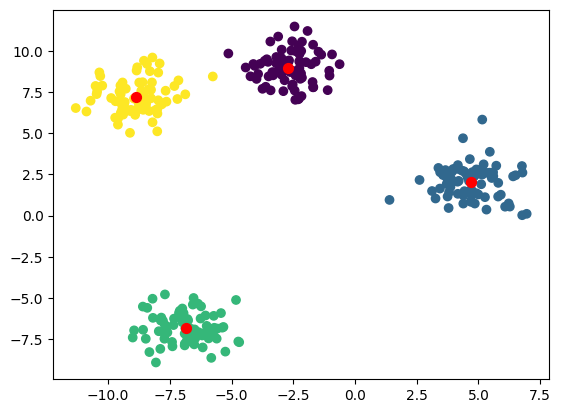

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centroids = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=50)
plt.show()

## Viết hàm xác định centroid của 4 phân cụm đó bằng thuật toán. 

In [2]:
def kmeans_with_random_init(X, n_clusters, n_init):
    best_centers = None
    best_score = np.inf
    best_labels = None
    best_dist = float('inf')
    for i in range(n_init):
        init_centers = np.random.randn(n_clusters, X.shape[1])
        kmeans = KMeans(n_clusters=n_clusters, init=init_centers, n_init=1).fit(X)
        centers = kmeans.cluster_centers_
        score = kmeans.inertia_
        
        if score < best_score:
            best_centers = centers
            best_score = score
        
        centroids = kmeans.cluster_centers_
        distances = np.zeros((n_clusters, n_clusters))
        for i in range(n_clusters):
            for j in range(i+1, n_clusters):
                distances[i,j] = np.linalg.norm(centroids[i] - centroids[j])
                distances[j,i] = distances[i,j]
        print("Độ chênh lệch khoảng cách trung bình giữa các cụm:")
        print(np.mean(distances))
        dist = np.mean(kmeans.inertia_)
        if dist < best_dist:
            best_labels = kmeans.labels_
            best_dist = dist
        print("Lần phân cụm tốt nhất có độ chênh lệch khoảng cách trung giữa các cụm là:", best_dist)

    
    return best_centers



## Vẽ tất cả các điểm và các centroid đã xác định lên trục toạ độ.

Độ chênh lệch khoảng cách trung bình giữa các cụm:
3.4723862289940346
Lần phân cụm tốt nhất có độ chênh lệch khoảng cách trung giữa các cụm là: 541.1355474745556
Độ chênh lệch khoảng cách trung bình giữa các cụm:
3.469051180845772
Lần phân cụm tốt nhất có độ chênh lệch khoảng cách trung giữa các cụm là: 541.1355474745556
Độ chênh lệch khoảng cách trung bình giữa các cụm:
3.4742982743842985
Lần phân cụm tốt nhất có độ chênh lệch khoảng cách trung giữa các cụm là: 541.0706032599595


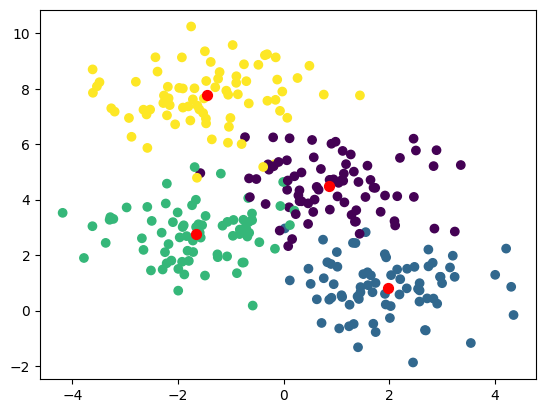

In [8]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0)

n_clusters = 4
n_init = 3
centers = kmeans_with_random_init(X, n_clusters, n_init)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o', s=50)
plt.show()


## Viết hàm dự đoán nếu có input là 1 điểm dữ liệu thì xác định nó thuộc centroid nào. 

In [14]:

def predict_cluster(point, centers):
    distances = np.sqrt(np.sum((centers - point)**2, axis=1))
    closest_cluster = np.argmin(distances)
    print("Điểm dữ liệu", point, "thuộc cụm ", closest_cluster)
    return closest_cluster

point = np.array([2, 2])
cluster_id = predict_cluster(point, centers)


Điểm dữ liệu [2 2] thuộc cụm  0


## Vẽ tất cả các điểm bao gồm điểm dữ liệu nhập vào và các centroid lên trục toạ độ

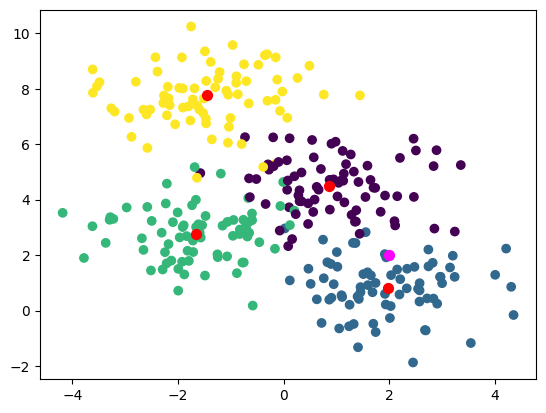

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o', s=50)
plt.scatter(point[0], point[1], c="magenta" ,marker='o', s=50 )
plt.show() 